In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import FeatureHasher

import seaborn as sns

In [2]:
df_MP=pd.read_csv("Data_MP_last_update.csv")
df_AFlow=pd.read_csv("data_from_aflow_1043_last_update.csv")
df_OQMD=pd.read_csv("oqmd_data_last_update.csv")

In [3]:
df_MP.shape

(451, 14)

In [4]:
df_AFlow.shape

(1043, 14)

In [5]:
df_OQMD.shape

(3369, 14)

In [6]:
df=pd.concat([df_MP,df_AFlow,df_OQMD])

In [7]:

print(df.shape)
df[20:25]

(4863, 14)


,Unnamed: 0,name,delta_e,ntypes,volume,Elm0,nbr0,Elm1,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
20,20,Zr(TiH2)2,-0.573294,3,134.399406,Ti,2,Zr,1,4,47.8670,91.2240,2.110982,0.049806
21,21,LiH2N,-0.592202,3,124.222791,Li,1,N,1,2,6.9410,14.0067,8.778596,0.026943
22,22,K2MgH4,-0.347566,3,108.908299,Mg,1,K,2,4,24.3050,39.0983,3.784505,0.061464
23,23,SiH4,-0.130738,2,274.768427,Si,1,NaN,0,4,28.0855,0.0000,12.553250,0.024362
24,24,Ba2MgH6,-0.550800,3,128.494109,Mg,1,Ba,2,6,24.3050,137.3270,1.982790,0.078143


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
df.head(50)

,name,delta_e,ntypes,volume,Elm0,nbr0,Elm1,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
0,Ti20H2N17,-1.743870,3,379.154163,Ti,20,N,17,2,47.867000,14.006700,0.168345,0.008827
1,CaH3Pd,-0.514892,3,50.929335,Ca,1,Pd,1,3,40.078000,106.420000,2.022327,0.098577
2,BeH2,-0.166498,2,140.319142,Be,1,NaN,0,2,9.012182,0.000000,18.279549,0.023853
3,SmH2,-0.767608,2,38.864183,Sm,1,NaN,0,2,150.360000,0.000000,1.322965,0.086120
4,As3(HO2)5,-1.459528,3,185.324892,As,3,O,10,5,74.921600,15.999400,1.292899,0.045150
5,Ca7(H6Cl)2,-0.987079,3,275.933241,Ca,7,Cl,2,12,40.078000,35.453000,3.327017,0.072778
6,H4I3N,-0.557515,3,700.245438,I,3,N,1,4,126.904470,14.006700,1.011095,0.009559
7,LiBH4,-0.450210,3,209.370399,B,1,Li,1,4,10.811000,6.941000,18.508100,0.031972
8,NaAlH4,-0.249924,3,134.152269,Al,1,Na,1,4,26.981538,22.989770,7.465798,0.049898
9,KHS,-0.941678,3,139.127768,K,1,S,1,1,39.098300,32.065000,1.396595,0.012028


In [10]:
df.shape

(4863, 13)

In [11]:
df[(df["Gravimetrie"]>6 ) & (df["Volumetrie(Kg H/L)"]>0.09)].shape

(375, 13)

In [12]:
dh=df.copy()

In [37]:
dh.head(50)

,delta_e,ntypes,volume,Elm0,nbr0,Elm1,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
0,-7654.650193,3,-11.067406,-1.0,-0.604167,0.0,17,2,47.867000,14.006700,0.168345,0.008827
1,-14674.083497,3,-11.162662,-1.0,-1.000000,0.0,1,3,40.078000,106.420000,2.022327,0.098577
2,-16663.967006,2,-11.136720,0.0,-1.000000,0.0,0,2,9.012182,0.000000,18.279549,0.023853
3,-13230.666811,2,-11.166164,-1.0,-1.000000,0.0,0,2,150.360000,0.000000,1.322965,0.086120
4,-9278.698879,3,-11.123658,-1.0,-0.958333,0.0,10,5,74.921600,15.999400,1.292899,0.045150
5,-11977.141448,3,-11.097362,-1.0,-0.875000,-1.0,2,12,40.078000,35.453000,3.327017,0.072778
6,-14430.637375,3,-10.974219,1.0,-0.958333,0.0,1,4,126.904470,14.006700,1.011095,0.009559
7,-15043.519877,3,-11.116680,0.0,-1.000000,-2.0,1,4,10.811000,6.941000,18.508100,0.031972
8,-16187.473522,3,-11.138510,0.0,-1.000000,0.0,1,4,26.981538,22.989770,7.465798,0.049898
9,-12236.453075,3,-11.137066,0.0,-1.000000,-1.0,1,1,39.098300,32.065000,1.396595,0.012028


In [14]:
from sklearn.feature_extraction import FeatureHasher
# Instantiate the feature hasher with the desired number of output features
hasher = FeatureHasher(n_features=3, input_type='string')

# Transform 'feature1'
feature0_encoded = hasher.transform(dh['Elm0'].astype(str))
# Transform 'feature2' after filling NaN values
feature1_encoded = hasher.transform(dh['Elm1'].fillna('NaN').astype(str))

dh["Elm0"]= feature0_encoded.toarray()
dh["Elm1"]= feature1_encoded.toarray()

"""
# Convert the encoded features back to DataFrames
feature1_encoded_dh = pd.DataFrame(feature1_encoded.toarray()), columns=['feature1_hashed_' + str(i) for i in range(1,2)])
feature2_encoded_dh = pd.DataFrame(feature2_encoded.toarray(), columns=['feature2_hashed_' + str(i) for i in range(2,3)])
"""

"\n# Convert the encoded features back to DataFrames\nfeature1_encoded_dh = pd.DataFrame(feature1_encoded.toarray()), columns=['feature1_hashed_' + str(i) for i in range(1,2)])\nfeature2_encoded_dh = pd.DataFrame(feature2_encoded.toarray(), columns=['feature2_hashed_' + str(i) for i in range(2,3)])\n"

In [15]:
#pd.concat([feature1_encoded_dh,feature2_encoded_dh],axis=1)

In [16]:
dh

,name,delta_e,ntypes,volume,Elm0,nbr0,Elm1,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
0,Ti20H2N17,-1.743870,3,379.154163,-1.0,20,0.0,17,2,47.867000,14.0067,0.168345,0.008827
1,CaH3Pd,-0.514892,3,50.929335,-1.0,1,0.0,1,3,40.078000,106.4200,2.022327,0.098577
2,BeH2,-0.166498,2,140.319142,0.0,1,0.0,0,2,9.012182,0.0000,18.279549,0.023853
3,SmH2,-0.767608,2,38.864183,-1.0,1,0.0,0,2,150.360000,0.0000,1.322965,0.086120
4,As3(HO2)5,-1.459528,3,185.324892,-1.0,3,0.0,10,5,74.921600,15.9994,1.292899,0.045150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,Cs3YbH5,-0.187486,3,465.284000,-2.0,3,-1.0,1,5,132.905450,173.0400,0.873740,0.017983
3365,K2YbH4,-0.310628,3,133.494000,0.0,2,-1.0,1,4,39.098300,173.0400,1.579420,0.050144
3366,KZnH3,-0.061055,3,326.280000,0.0,1,-1.0,1,3,39.098300,65.4090,2.812042,0.015387
3367,RbZnH3,-0.063820,3,374.449000,1.0,1,-1.0,1,3,85.467800,65.4090,1.964787,0.013408


In [17]:
dh.describe()

,delta_e,ntypes,volume,Elm0,nbr0,Elm1,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
count,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000
mean,-0.819304,2.947769,167.148460,-0.356570,2.317911,-0.230311,2.369936,4.867983,80.076469,58.780876,2.837888,0.056583
std,0.709417,0.222516,181.092137,0.751758,3.227508,0.654078,3.367076,6.574436,58.342207,56.539861,3.531164,0.039377
min,-3.084604,2.000000,11.174200,-2.000000,1.000000,-2.000000,0.000000,1.000000,6.941000,0.000000,0.051573,0.000655
25%,-1.332990,3.000000,70.749700,-1.000000,1.000000,-1.000000,1.000000,1.000000,26.981538,15.999400,0.882995,0.023651
50%,-0.535197,3.000000,110.201000,0.000000,1.000000,0.000000,1.000000,3.000000,58.693400,32.065000,1.625853,0.047693
75%,-0.266020,3.000000,185.630000,0.000000,2.000000,0.000000,2.000000,6.000000,138.905500,88.905850,3.085682,0.085518
max,-0.000175,3.000000,3445.685549,1.000000,48.000000,1.000000,48.000000,96.000000,244.000000,238.028910,25.131806,0.208062


In [18]:
def  normalize_function(X):
    max_x=max(X)
    min_x=min(X)
    return (X-min_x)/max_x-min_x

In [19]:
#normalize_function(dh["nbr0"])

In [20]:
to_romove=["name","ntypes","Elm0","Elm1"]
column_have_t_be_noramlize=[col for col in list(dh.columns) if col not in to_romove]

In [21]:
dh_normalize=dh[column_have_t_be_noramlize]

In [22]:
dh_normalize

,delta_e,volume,nbr0,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
0,-1.743870,379.154163,20,17,2,47.867000,14.0067,0.168345,0.008827
1,-0.514892,50.929335,1,1,3,40.078000,106.4200,2.022327,0.098577
2,-0.166498,140.319142,1,0,2,9.012182,0.0000,18.279549,0.023853
3,-0.767608,38.864183,1,0,2,150.360000,0.0000,1.322965,0.086120
4,-1.459528,185.324892,3,10,5,74.921600,15.9994,1.292899,0.045150
...,...,...,...,...,...,...,...,...,...
3364,-0.187486,465.284000,3,1,5,132.905450,173.0400,0.873740,0.017983
3365,-0.310628,133.494000,2,1,4,39.098300,173.0400,1.579420,0.050144
3366,-0.061055,326.280000,1,1,3,39.098300,65.4090,2.812042,0.015387
3367,-0.063820,374.449000,1,1,3,85.467800,65.4090,1.964787,0.013408


In [23]:
for col in  dh_normalize.columns: 
    dh_normalize[col]=normalize_function(dh_normalize[col])

/tmp/ipykernel_10801/3822449019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh_normalize[col]=normalize_function(dh_normalize[col])


In [24]:
dh_normalize

,delta_e,volume,nbr0,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
0,-7654.650193,-11.067406,-0.604167,0.354167,-0.989583,-6.773270,0.058845,-0.046927,0.038622
1,-14674.083497,-11.162662,-1.000000,0.020833,-0.979167,-6.805193,0.447089,0.026844,0.469981
2,-16663.967006,-11.136720,-1.000000,0.000000,-0.989583,-6.932512,0.000000,0.673722,0.110836
3,-13230.666811,-11.166164,-1.000000,0.000000,-0.989583,-6.353217,0.000000,-0.000984,0.410108
4,-9278.698879,-11.123658,-0.958333,0.208333,-0.958333,-6.662391,0.067216,-0.002180,0.213198
...,...,...,...,...,...,...,...,...,...
3364,-16544.092273,-11.042409,-0.958333,0.020833,-0.958333,-6.424752,0.726971,-0.018859,0.082628
3365,-15840.757416,-11.138701,-0.979167,0.020833,-0.968750,-6.809208,0.726971,0.009220,0.237201
3366,-17266.218339,-11.082751,-1.000000,0.020833,-0.979167,-6.809208,0.274794,0.058267,0.070149
3367,-17250.421745,-11.068771,-1.000000,0.020833,-0.979167,-6.619169,0.274794,0.024554,0.060635


In [25]:
dh_normalize.describe()

,delta_e,volume,nbr0,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
count,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000
mean,-12935.402142,-11.128933,-0.972544,0.049374,-0.959709,-6.641264,0.246948,0.059295,0.268146
std,4051.907544,0.052556,0.067240,0.070147,0.068484,0.239107,0.237534,0.140506,0.189255
min,-17613.938346,-11.174200,-1.000000,0.000000,-1.000000,-6.941000,0.000000,-0.051573,-0.000655
25%,-16095.537458,-11.156910,-1.000000,0.020833,-1.000000,-6.858867,0.067216,-0.018491,0.109869
50%,-14558.110555,-11.145461,-1.000000,0.020833,-0.979167,-6.728900,0.134711,0.011068,0.225419
75%,-10001.434221,-11.123570,-0.979167,0.041667,-0.947917,-6.400162,0.373509,0.069155,0.407216
max,3.084604,-10.177443,-0.020833,1.000000,-0.010417,-5.969447,1.000000,0.946375,0.996195


In [26]:
lista=[dh["name"],
dh_normalize["delta_e"],
dh["ntypes"],
dh_normalize["volume"],
dh["Elm0"],
dh_normalize["nbr0"],
dh["Elm1"],
dh.loc[:,'nbr1':]]

dh=pd.concat(lista,axis=1)

In [27]:
dh=dh.loc[:,"delta_e":]

In [28]:
dh

,delta_e,ntypes,volume,Elm0,nbr0,Elm1,nbr1,H,Ml_Elm0,Ml_Elm1,Gravimetrie,Volumetrie(Kg H/L)
0,-7654.650193,3,-11.067406,-1.0,-0.604167,0.0,17,2,47.867000,14.0067,0.168345,0.008827
1,-14674.083497,3,-11.162662,-1.0,-1.000000,0.0,1,3,40.078000,106.4200,2.022327,0.098577
2,-16663.967006,2,-11.136720,0.0,-1.000000,0.0,0,2,9.012182,0.0000,18.279549,0.023853
3,-13230.666811,2,-11.166164,-1.0,-1.000000,0.0,0,2,150.360000,0.0000,1.322965,0.086120
4,-9278.698879,3,-11.123658,-1.0,-0.958333,0.0,10,5,74.921600,15.9994,1.292899,0.045150
...,...,...,...,...,...,...,...,...,...,...,...,...
3364,-16544.092273,3,-11.042409,-2.0,-0.958333,-1.0,1,5,132.905450,173.0400,0.873740,0.017983
3365,-15840.757416,3,-11.138701,0.0,-0.979167,-1.0,1,4,39.098300,173.0400,1.579420,0.050144
3366,-17266.218339,3,-11.082751,0.0,-1.000000,-1.0,1,3,39.098300,65.4090,2.812042,0.015387
3367,-17250.421745,3,-11.068771,1.0,-1.000000,-1.0,1,3,85.467800,65.4090,1.964787,0.013408


In [29]:
# col=["delta_e","volume","Elm0","Elm1","H","Ml_Elm0","Ml_Elm1","Gravimetrie","Volumetrie(Kg H/L)"]
# dh_p=dh[col][1000:1600]
# #sns.set_theme(style="ticks")
# sns.pairplot(dh_p)


In [30]:
dh["Elm0"].unique()

array([-1.,  0.,  1., -2.])

pour choisire un alrgorithme de machine learning 
veuiller respecter les criteres:
    
Quantite de nos données:  vue que on un petite dataset et sont des données structureés(tabular data) non  normale (il suit pas une distribution normale )
sasera deficile de travailler avec les modeles paramétrer (regression linear, Regression logistique, Naive Bayes) puis que on a pas des categorial data , 
on est tent à utiliser SVM, KNN algorithme en premier temps.  


# LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X=dh.loc[:,:"Ml_Elm1"]
y_miltilabel=dh.loc[:,"Gravimetrie":]
X_train, X_test, y_train, y_test = train_test_split(X,y_miltilabel, test_size=0.2, random_state=1)
model = LinearRegression()
random_state=0
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mean_squared_error",mse)
print('mean_absolute_error',mae)
print("r2",r2)

mean_squared_error 2.141844838970415
mean_absolute_error 0.6918184581460193
r2 0.5948457264553448


# DecisionTree

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=dh.loc[:,:"Ml_Elm1"]
y_miltilabel=dh.loc[:,"Gravimetrie":]
# Assuming you have already preprocessed your data and have feature matrix X and target variables y1 and y2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y_miltilabel, test_size=0.2, random_state=1)
# Instantiate the Decision Tree regressor
tree = DecisionTreeRegressor()
random_state=0
# Fit the model on the training data
tree.fit(X_train, y_train)
# Make predictions on the test data
y_pred = tree.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5543833202562181


# RandomForest

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
random_state=0
X=dh.loc[:,:"Ml_Elm1"]
y_miltilabel=dh.loc[:,"Gravimetrie":]
# Assuming you have already preprocessed your data and have feature matrix X and target variables y1 and y2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y_miltilabel, test_size=0.2, random_state=1)
# Instantiate the Decision Tree regressor

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mean_squared_error",mse)
print('mean_absolute_error',mae)
print("r2",r2)

mean_squared_error 0.1473640058729274
mean_absolute_error 0.09453773509205159
r2 0.9513221522726998


# Support vector machine 

In [34]:
# from sklearn.svm import SVR

# model = SVR(kernel='linear')
# random_state=0
# X=dh.loc[:,:"Ml_Elm1"]
# y_miltilabel=dh["Gravimetrie"]
# # Assuming you have already preprocessed your data and have feature matrix X and target variables y1 and y2

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X,y_miltilabel, test_size=0.2, random_state=1)
# # Instantiate the Decision Tree regressor

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# # Evaluate the model

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("mean_squared_error",mse)
# print('mean_absolute_error',mae)
# print("r2",r2)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.model_selection  import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=dh.loc[:,:"Ml_Elm1"]
y_miltilabel=dh.loc[:,"Gravimetrie":]
X_train, X_test, y_train, y_test = train_test_split(X,y_miltilabel, test_size=0.2, random_state=1)
model = KNeighborsRegressor()
random_state=0
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mean_squared_error",mse)
print("r2",r2)

mean_squared_error 1.5382945455295862
r2 0.5482480386678357


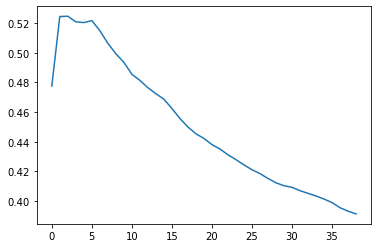

In [36]:
val_score=[]
for  k in range (1,40):
    score =cross_val_score(KNeighborsRegressor(k),X_train,y_train,cv=5).mean()
    val_score.append(score)
plt.plot(val_score)